# Question 1

In computer vision, image zooming is a process that enlarges or reduces an
image while preserving or altering its details.
You are provided with an image, einstein.jpg, and your task is to apply
zooming with a factor of 2 using the following two methods: Pixel
replication and Zero-order hold.

## A) Describe each of the two methods (Pixel replication, Zero-order hold) for image zooming.
## B) Implement Python code to perform zooming in on the image 'einstein.jpg' using a zoom factor of 2 for each of the two methods. Provide step-by-step explanations of your code for each method.

Original shape: (182, 189)
Zoomed shape: (364, 378)


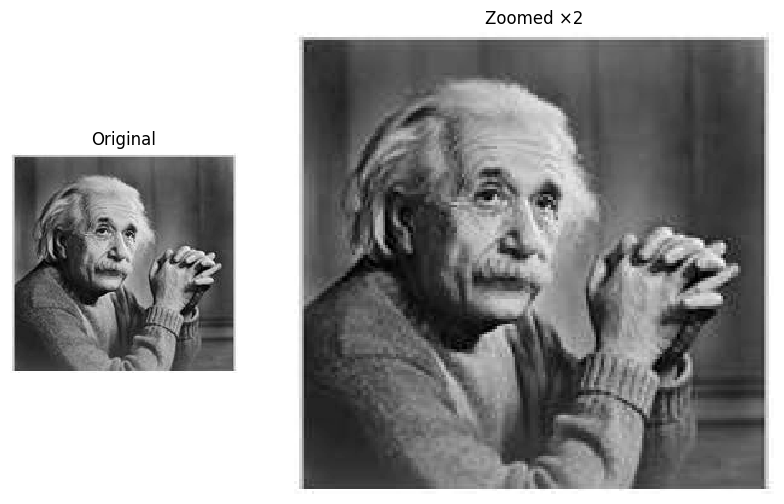

In [102]:
import cv2
import matplotlib.pyplot as plt

# --- Read the image in grayscale ---
img = cv2.imread('./Required Files/einstein.jpg', cv2.IMREAD_GRAYSCALE)

# --- Zoom the image using zero-order hold (nearest neighbor) ---
zoom_factor = 2
zoomed = cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_NEAREST)

# --- Print the shapes to verify the zoom ---
print("Original shape:", img.shape)
print("Zoomed shape:", zoomed.shape)

# --- Create a figure for subplots with a specific size ---
fig = plt.figure(figsize=(10, 6))  # Width=10 inches, Height=6 inches

# --- Create subplots with different widths to emphasize zoom difference ---
ax1 = plt.subplot2grid((1, 3), (0, 0))           # First subplot at row 0, column 0
ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2) # Second subplot at row 0, column 1, spanning 2 columns

# --- Display the original image ---
ax1.imshow(img, cmap='gray', interpolation='none') # Show image without interpolation
ax1.set_title('Original')                           # Set title
ax1.axis('off')                                     # Remove axes for cleaner look

# --- Display the zoomed image ---
ax2.imshow(zoomed, cmap='gray', interpolation='none') # Show zoomed image without interpolation
ax2.set_title(f'Zoomed ×{zoom_factor}')               # Set title
ax2.axis('off')                                       # Remove axes

# --- Show the figure with both subplots ---
plt.show()

## C) For each of the two methods, discuss their advantages and disadvantages.Consider aspects such as image quality, computational complexity, and suitability for different types of images.

### Advantages
- Simple to implement
- Very fast

### Disadvanteges
- No smoothing or interpolation
- Poor quality for large zoom factors

## D) Display the zoomed images for the two methods and report the results.Examine the effects of increasing the zoom factor (e.g., from 2 to 4) on image quality and detail preservation.

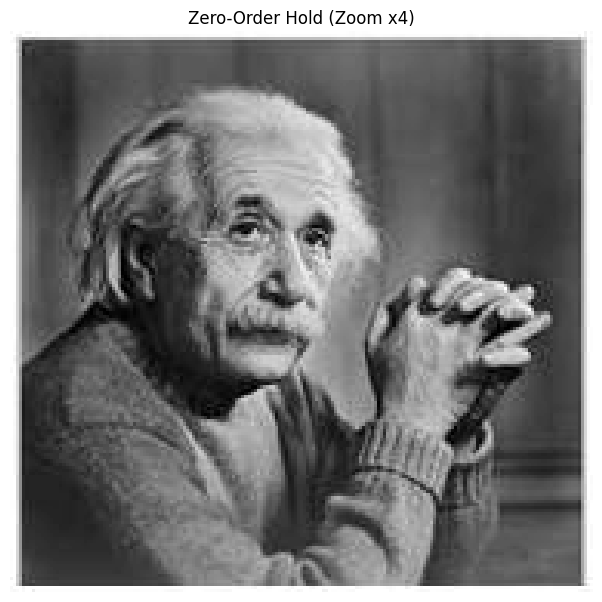

(728, 756)


In [103]:
zoom_factor = 4
zoomed_4x = cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_NEAREST)
# --- Get image dimensions ---
height, width = zoomed_4x.shape

# figsize in inches = pixels / dpi
dpi = 100
figsize = (width / dpi, height / dpi)  # width and height in inches

plt.figure(figsize=figsize, dpi=dpi)
plt.imshow(zoomed_4x, cmap='gray', interpolation='none')  # no interpolation
plt.title(f'Zero-Order Hold (Zoom x{zoom_factor})')
plt.axis('off')  # hide axes to see real pixel size
plt.show()
print(zoomed_4x.shape)


## E) Suggest an improved zooming method and compare its results with the two experimented methods.

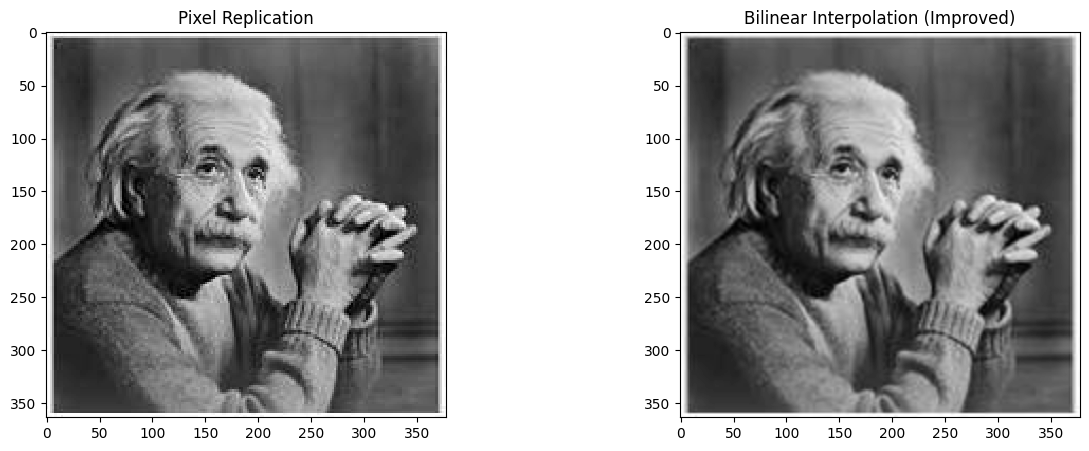

In [104]:
zoom_factor = 2

# --- Bilinear interpolation zoom (smoother and improved quality) ---
# cv2.resize with INTER_LINEAR computes a weighted average of neighboring pixels
zoomed_bilinear = cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)

# --- Create a figure with 3 subplots side by side ---
plt.figure(figsize=(15, 5))  # Width=15 inches, Height=5 inches

# --- First subplot: Pixel replication / Zero-Order Hold
plt.subplot(1, 2, 1)
plt.title('Pixel Replication')
plt.imshow(zoomed, cmap='gray', interpolation='none')

# --- Third subplot: Bilinear interpolation ---
plt.subplot(1, 2, 2)
plt.title('Bilinear Interpolation (Improved)')
plt.imshow(zoomed_bilinear, cmap='gray', interpolation='none')

# --- Display all subplots ---
plt.show()

# Question 2
You are given a low-contrast grayscale image, 'low_contrast.jpg', which has
lost significant details due to insufficient contrast. Your task is to enhance the
image using logarithmic and gamma correction techniques. Additionally, you
need to plot the histograms of the original and enhanced images for
comparison

## A) Normalize the image to ensure its pixel values are within range (0 to 1).

In [105]:
import numpy as np

img2 = cv2.imread('./Required Files/low_contrast.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

# --- Normalize pixel values to range [0,1]
Xmin = img.min()
Xmax = img.max()
img_normalized = (img2.astype(np.float32) - Xmin) / (Xmax - Xmin)

# --- Optional: check min/max ---
print(f"Min pixel value: {img_normalized.min()}")
print(f"Max pixel value: {img_normalized.max()}")

Min pixel value: 0.3686274588108063
Max pixel value: 0.9843137264251709


## B) Describe each of the two methods (Logarithmic correction and Gamma correction) for contrast stretching.

### 1. **Logarithmic Correction**

* Formula:

  `s = c . log(1 + r)`
  
  where:

  * `r` = normalized pixel value (0–1)
  * `c` = scaling constant
  * `s` = enhanced pixel value

### 2. **Gamma Correction**

* Formula:
  `s = r^γ`

  where:

  * (`γ` < 1) → brighten image
  * (`γ` > 1) → darken image

## C) Apply logarithmic contrast stretching to 'low_contrast.jpg' using the formula

In [106]:
c = 1.0 / np.log(1 + img_normalized.max())  # scale to [0,1]

img_log = c * np.log(1 + img_normalized)
img_log = np.clip(img_log * 255, 0, 255)

# Optional: check min/max
print("Log-enhanced min/max:", img_log.min(), img_log.max())

Log-enhanced min/max: 116.77261 254.99998


## D) Apply gamma correction to 'low_contrast.jpg'. Choose a suitable 'gamma' value for enhancing the image's contrast.

In [107]:
# --- Gamma correction ---
gamma_l = 0.5  # gamma < 1
img_gammaL = np.power(img_normalized, gamma_l)
img_gammaL = np.clip(img_gammaL * 255, 0, 255)  # keep values in [0,1]

gamma_g = 2  # gamma > 1
img_gammaG = np.power(img_normalized, gamma_g)
img_gammaG = np.clip(img_gammaG * 255, 0, 255)  # keep values in [0,1]

# Optional: check min/max
print("GammaL-enhanced min/max:", img_gammaL.min(), img_gammaL.max())
print("GammaG-enhanced min/max:", img_gammaG.min(), img_gammaG.max())


GammaL-enhanced min/max: 154.82248 252.9921
GammaG-enhanced min/max: 34.65098 247.06274


## E) After applying both contrast enhancement techniques, plot histograms for the original and enhanced images on a single figure.

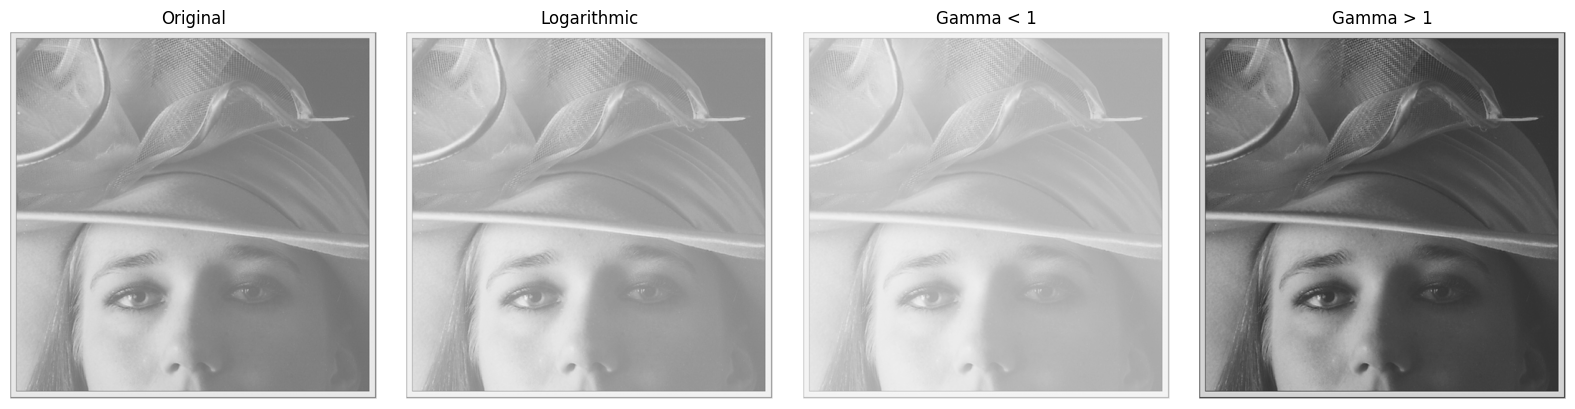

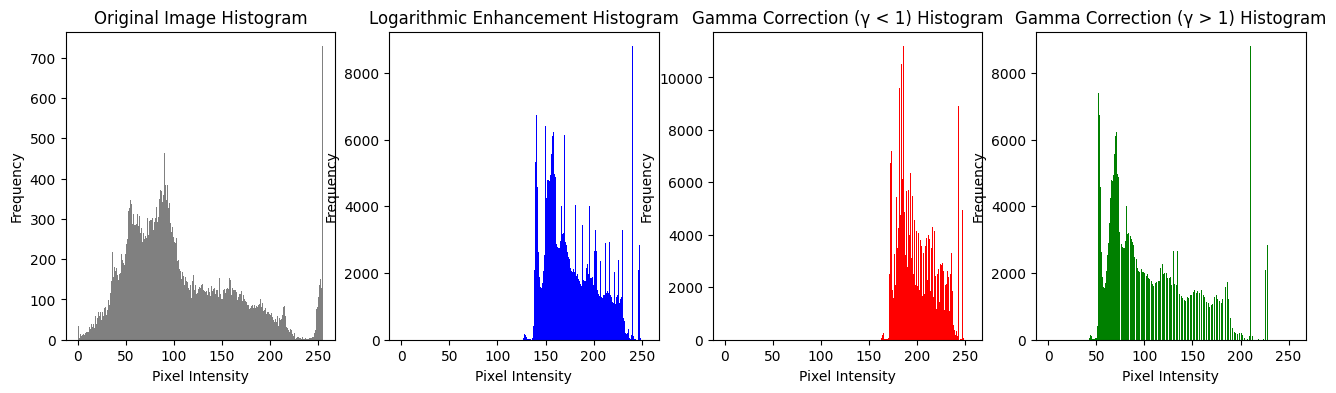

In [109]:
# --- Display all images in a single figure with subplots ---
plt.figure(figsize=(16,4))

# Original image
plt.subplot(1,4,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.title('Original')
plt.axis('off')

# Logarithmic enhancement
plt.subplot(1,4,2)
plt.imshow(img_log, cmap='gray', vmin=0, vmax=255)
plt.title('Logarithmic')
plt.axis('off')

# Gamma < 1
plt.subplot(1,4,3)
plt.imshow(img_gammaL, cmap='gray', vmin=0, vmax=255)
plt.title('Gamma < 1')
plt.axis('off')

# Gamma > 1
plt.subplot(1,4,4)
plt.imshow(img_gammaG, cmap='gray', vmin=0, vmax=255)
plt.title('Gamma > 1')
plt.axis('off')

plt.tight_layout()
plt.show()


# --- Plot histograms separately ---
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.hist(img.flatten(), bins=256, range=(0,255), color='gray')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.subplot(1,4,2)
plt.hist(img_log.flatten(), bins=256, range=(0,255), color='blue')
plt.title('Logarithmic Enhancement Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.subplot(1,4,3)
plt.hist(img_gammaL.flatten(), bins=256, range=(0,255), color='red')
plt.title('Gamma Correction (γ < 1) Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


plt.subplot(1,4,4)
plt.hist(img_gammaG.flatten(), bins=256, range=(0,255), color='green')
plt.title('Gamma Correction (γ > 1) Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

